# Machine Learning Project 1
---

In [1]:
## import required libraries
import numpy as np
import matplotlib.pyplot as plt

## global variables
k = 9
gamma = 0.148

In [2]:
def format_train_test_data(dataset):
    """
    A function to properly structure the dataset given for 
    machine learning and split into features and labels.
    
    Parameters
    ----------
    dataset - list of str
    txt file loaded as working data
    
    Returns
    -------
    data - numpy array of float
    features to use for machine learning
    
    labels - numpy array of float
    target label to train and predict
    """
    
    data = []
    labels = []

    for i in [i[:-2].split(',') for i in dataset]:
        data.append(float(i[0]))
        labels.append(float(i[1]))
    
    return np.array(data), np.array(labels)

In [3]:
## load data
with open('train.txt') as f:
    train_dataset = f.readlines()
    f.close()
    
with open('test.txt') as f:
    test_dataset = f.readlines()
    f.close()

In [4]:
## split the data samples and target labels
train_data, train_labels = format_train_test_data(train_dataset)
test_data, test_labels = format_train_test_data(test_dataset)

## Linear Regression
---

In [5]:
train_data

array([-1.8475, -1.7145, -1.799 ,  1.9735, -2.1055, -1.9045,  2.8715,
        1.0555, -2.3495,  0.0095, -2.058 ,  1.088 , -2.975 ,  0.0055,
        0.7355, -1.992 ,  0.8455,  1.1435,  2.726 ,  0.829 ,  2.558 ,
        2.6245, -2.767 , -1.5505,  1.0515, -2.528 ,  0.171 ,  1.5595,
       -1.775 , -2.292 ,  0.9735, -2.553 , -1.6655,  0.779 ,  0.7455,
        0.6135,  1.0505, -1.424 , -0.28  ,  1.0075,  2.546 , -1.086 ,
       -2.1855, -2.5675,  0.7245,  1.3365,  2.367 , -1.31  , -1.4615,
       -0.6745, -2.807 , -0.341 ,  1.9135, -1.007 , -0.938 , -1.3405,
        0.432 ,  0.5765, -1.8885, -1.8005,  0.709 , -1.374 , -2.1065,
       -0.4975,  1.065 , -0.4505,  0.0255,  1.5385, -0.8035, -2.8775,
        2.3425,  0.9755,  2.8815, -2.3325, -1.5275, -2.9085,  0.7415,
       -0.8315,  1.8745,  1.2025, -1.2145,  1.807 ,  1.821 , -0.7235,
       -1.8515, -2.1   , -1.054 ,  0.2195,  0.0765, -2.9935, -1.272 ,
        2.643 , -0.976 ,  1.8175, -2.0385,  1.8325, -0.278 , -0.3905,
       -0.665 , -1.4

In [6]:
train_labels

array([3.36521471, 3.62150642, 2.77288215, 3.33545393, 2.65599921,
       3.15785379, 4.01381019, 4.20567855, 3.04801762, 4.15355878,
       3.788929  , 4.17386981, 3.407027  , 4.05331679, 4.09784179,
       2.89698757, 3.55959317, 3.32861496, 3.86758951, 3.58373174,
       3.19240231, 3.49183074, 3.67324263, 3.2789379 , 4.15117506,
       3.15985355, 3.83782813, 3.75594202, 2.81480768, 3.26089534,
       3.66120128, 3.5196493 , 3.53272489, 3.88545922, 4.08844463,
       3.68528903, 4.03036925, 2.8751021 , 3.68620773, 3.18904313,
       3.32995593, 2.89154541, 3.23046642, 2.96775281, 4.1067371 ,
       3.22507235, 3.8430813 , 3.35534313, 3.38976192, 3.91392252,
       2.7616583 , 4.03269254, 3.83118592, 3.68644366, 2.81412939,
       3.90227339, 3.78068581, 3.36177703, 3.38587433, 3.1698534 ,
       4.20372703, 3.85510948, 2.51949364, 3.53277336, 4.22925152,
       3.54185191, 3.98231433, 3.82062565, 3.48414648, 3.16619382,
       3.80495969, 3.7205957 , 3.67743934, 2.73038359, 3.33356

In [7]:
test_data

array([ 2.9285,  1.0435, -0.81  ,  0.304 ,  2.759 , -0.466 ,  0.393 ,
        2.061 ,  0.472 , -2.668 ])

In [8]:
test_labels

array([3.73256587, 3.16233331, 3.68827889, 3.02815428, 3.2981016 ,
       3.42671802, 4.0360535 , 3.22793407, 3.80969437, 3.48972569])

In [9]:
def gen_feature_matrix(data, k, d):
    """
    This function computes the basis functions for a given 
    set of x-values, frequency increment k, and function depth d.
    
    Parameters
    ----------
    data - numpy array of float
    
    k - int
    global value defined at the top
    
    d - int
    variable ranging from 0 to 6
    

    Returns
    -------
    a numpy array of shape (N, 2*d+2), where N is the number of x-values.
    """
    
    sin_cos = np.empty((len(data), 2*d))
    for i in range(d):
        sin_cos[:, 2*i] = ((np.sin((i+1)*k*data))**(i*k))*np.cos(data)
        sin_cos[:, 2*i+1] = ((np.cos((i+1)*k*data))**(i*k))*np.sin(data)
    
    return np.column_stack((np.ones_like(data), data, sin_cos, np.sin(k*data), np.cos(k*data)))

In [10]:
### ------------------------------------------------------------------------------- ###
### ------------------------------ PROBLEM 1, PART A ------------------------------ ###
### ------------------------------------------------------------------------------- ###
def linear_regression(x_train, y_train, x_test, y_test, k, d):
    """
    Fits a linear regression model to the training data and evaluates its performance on the testing data.
    
    Parameters
    ----------
    x_train - numpy array of float
    training data features
    
    y_train - numpy array of float
    training labels
    
    x_test - numpy array of float
    testing data features
    
    y_test - numpy array of float
    testing labels
    
    k - int
    global value defined at the top
    
    d - int
    variable ranging from 0 to 6
    
    Returns
    -------
    
    beta -
    the fitted parameter vector
    
    y_pred_train - 
    
    y_pred_test -
    
    mse - 
    the mean squared error (MSE) on the testing data
    
    
    """
    
    X_train = gen_feature_matrix(x_train, k, d)
    X_test = gen_feature_matrix(x_test, k, d)
    
    # compute the MPP of the design matrix
    X_pinv = np.linalg.pinv(X_train)    
    # fit the model to the training data
    beta = np.dot(X_pinv, y_train)
    
    # evaluate the model on the train data
    y_pred_train = np.dot(X_train, beta)
    # evaluate the model on the train data
    y_pred_test = np.dot(X_test, beta)
    
    mse = np.mean((y_test - y_pred_test)**2)
    
    return beta, y_pred_train, y_pred_test, mse

## Linear Regression Execution

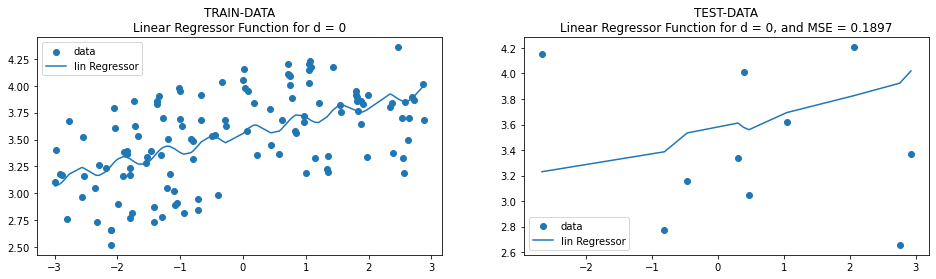

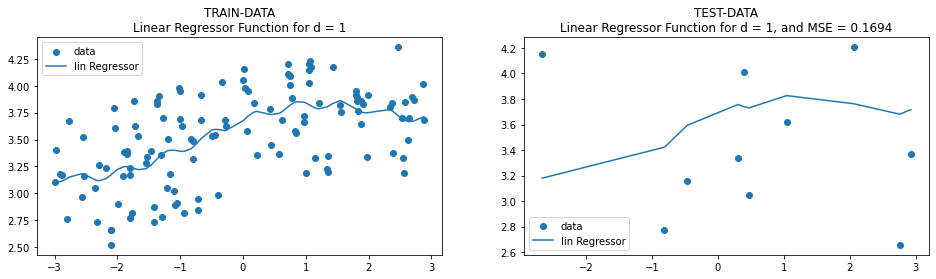

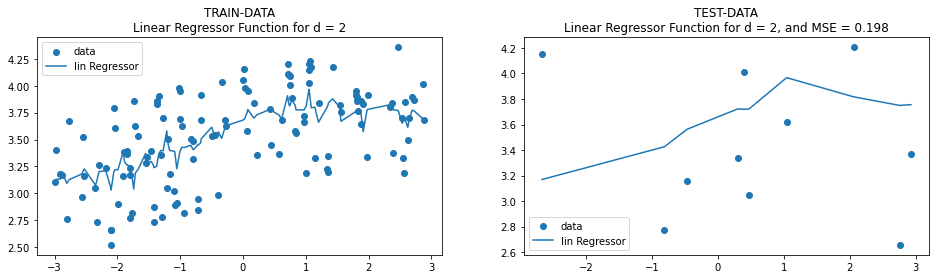

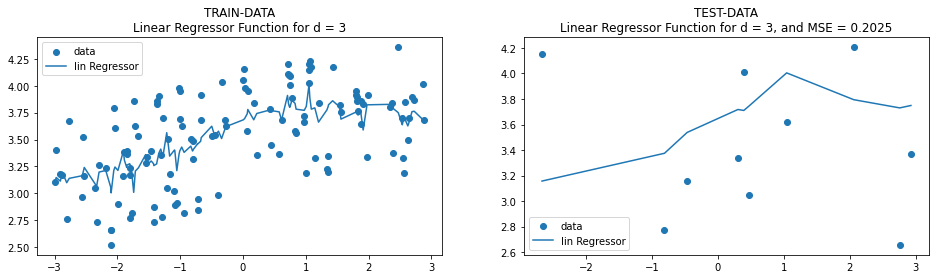

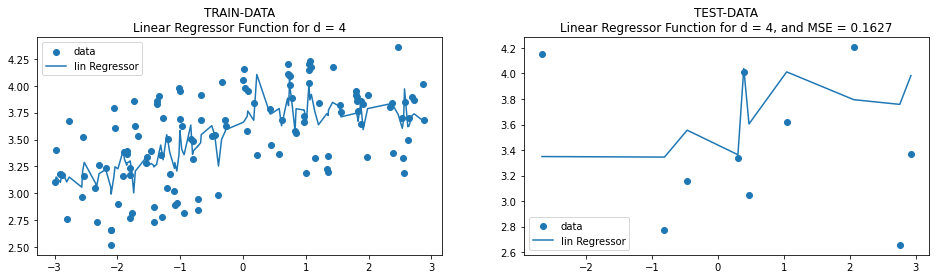

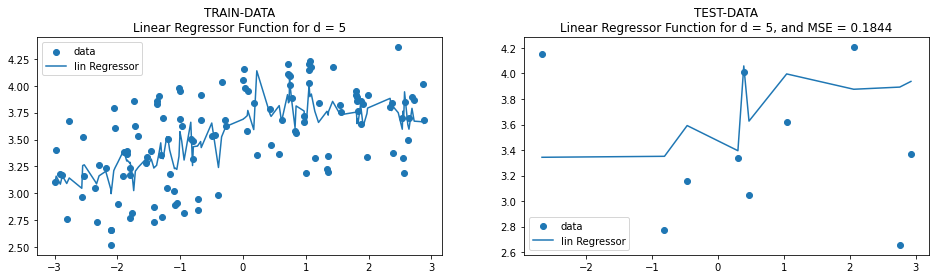

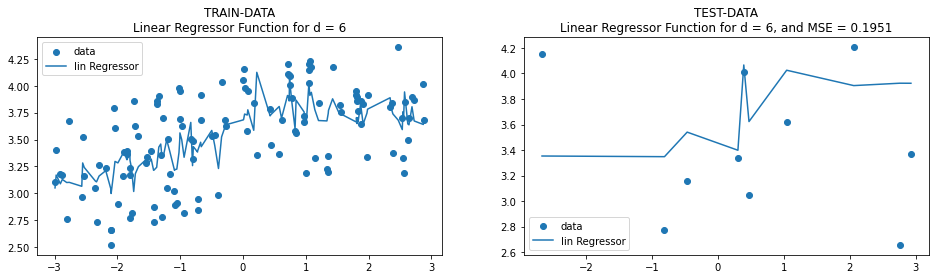

In [58]:
## Performance analysis on train_data

## -------- RUN ALL THE ABOVE CELLS BEFORE RUNNING THIS --------

def problem1(train_data, train_labels, test_data, test_labels, k):
    """
    Execution of linear regression problem 1 for project 1
    """
    
    train_sorted_ind = np.argsort(train_data)
    test_sorted_ind = np.argsort(test_data)

    mse_list = []

    ### ------------------------------------------------------------------------------- ###
    ### --------------------------- PROBLEM 1, PART B and C --------------------------- ###
    ### ------------------------------------------------------------------------------- ###

    for d in range(7):
        beta, y_pred_train, y_pred_test, mse = linear_regression(train_data, 
                                                                 train_labels, 
                                                                 test_data, 
                                                                 test_labels, 
                                                                 k, 
                                                                 d)

        mse_list.append(mse)

        ## plot figure for each iteration
        plt.figure(figsize=(16,4))
        plt.subplot(121)
        title = "TRAIN-DATA\nLinear Regressor Function for d = "+str(d)
        plt.title(title)
        plt.scatter(train_data[train_sorted_ind], train_labels[train_sorted_ind])
        plt.plot(train_data[train_sorted_ind], y_pred_train[train_sorted_ind])
        labels = ["data","lin Regressor"]
        plt.legend(labels)

        plt.subplot(122)
        title = "TEST-DATA\nLinear Regressor Function for d = "+str(d)+", and MSE = "+str(round(mse,4))
        plt.title(title)
        plt.scatter(test_data[test_sorted_ind], train_labels[test_sorted_ind])
        plt.plot(test_data[test_sorted_ind], y_pred_test[test_sorted_ind])
        labels = ["data","lin Regressor"]
        plt.legend(labels)

        plt.show()
    
    return mse_list


mse_list = problem1(train_data, train_labels, test_data, test_labels, k)

In [13]:
mse_list

[0.18974638714677605,
 0.16941529120457421,
 0.19797794262177268,
 0.20249443221274901,
 0.1627197183254449,
 0.18435124760446156,
 0.19514028219767182]

### Linear Regression Conclusion
---

In this program, I designed a linear regressor and tested its performance using test data. I am using Mean Squared Error (MSE) to determine the performance of the function.

In the above cell, we can see the output of variable mse_list
- The index signifies the depth value (d) 
- The value signifies the MSE for that depth (d)

#### Here are my <u>observations</u> about the regression function with variable function depths
- The data itself is pretty scattered
- For d = 1, the function is catching the trend of data points and is producing second lowest MSE for test data
- For d = 4, the MSE for test data is lowest
- But as discussed in class, I would choose the **regressor with function depth 1 to be the best model**, because it gives MSE close to minimum while capturing the natural trend of data
- I believe that as I am increasing the function depth, the model is overfitting. We can see the same thing using MSE as it starts to increase a little as d increases, precisely after d = 1.

# ----------------------------------------------------------------------------------

## Locally Weighted Linear Regression
---

In [14]:
def calculate_weights(X, x_query, gamma):
    """
    caluculate local weights for Linear Regression
    Parameters
    ----------
    X - numpy array of float
    train data
    
    x_query - numpy array of float
    local data
    
    gamma - float
    constant value given for the regression function
    
    Returns
    -------
    calculated local weights with respect to x_query
    """
    return np.exp(-(X - x_query) ** 2 / (2 * gamma ** 2))

### ------------------------------------------------------------------------------- ###
### ------------------------------ PROBLEM 2, PART A ------------------------------ ###
### ------------------------------------------------------------------------------- ###
def locally_weighted_linear_regression(X_train, y_train, x_query, gamma):
    """
    
    """
    
    weights = calculate_weights(X_train[:,1], x_query, gamma)
    W = np.diag(weights.flatten())
    temp = np.dot(X_train.T,W)
    theta = np.linalg.inv(X_train.T @ W @ X_train) @ X_train.T @ W @ y_train
    y_pred = (np.array([1, x_query]).T) @ theta

    return y_pred

In [19]:
## prepare data for only raw feature and a constant feature
def prepare_train_test_data_lwlr(data):
    """
    """
    
    X = np.zeros((len(data),2))
    X[:,0] = 1
    X[:,1] = data
    
    return X

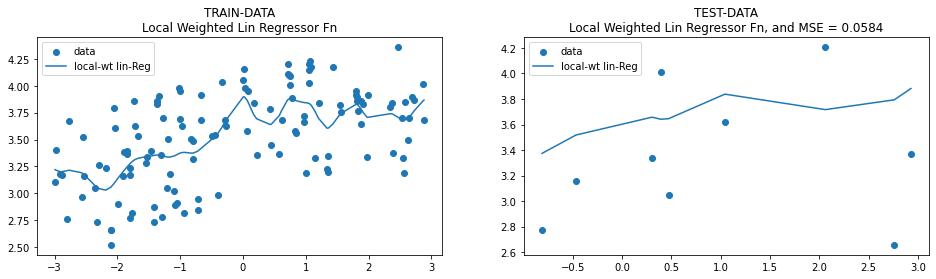

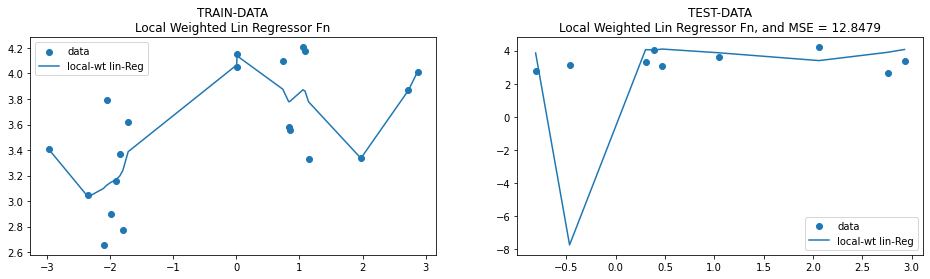

In [76]:
def problem2(train_data, test_data):
    X_train = prepare_train_test_data_lwlr(train_data)
    y_train = train_labels

    X_test = prepare_train_test_data_lwlr(test_data)
    y_test = test_labels

    ## execute the linear regression for local weights
    y_pred_train = []
    y_pred_test = []

    for train_row in train_data:
        # run locally weighted linear regression for train data
        y_pred_temp = locally_weighted_linear_regression(X_train, y_train, train_row, gamma)
        y_pred_train.append(y_pred_temp)

    for test_row in test_data:
        try:
            # run locally weighted linear regression for test data
            y_pred_temp = locally_weighted_linear_regression(X_train, y_train, test_row, gamma)
            y_pred_test.append(y_pred_temp)
        except:
            print('\nSKIPPING LAST INSTANCE BECAUSE\nMATRIX INVERSE NOT POSSIBLE FOR INSTANCE x_test = {}'.format(test_row))
            
    mse = np.mean((y_test[-1] - y_pred_test)**2)
            
    ### ------------------------------------------------------------------------------- ###
    ### --------------------------- PROBLEM 2, PART B and C --------------------------- ###
    ### ------------------------------------------------------------------------------- ###
    
    train_sorted_ind = np.argsort(train_data)
    ## skipping last test instance as matrix inverse not possible, hence can not plot for that
    test_sorted_ind = np.argsort(test_data[:-1])
    
    ## plot figure for performance analysis
    plt.figure(figsize=(16,4))
    plt.subplot(121)
    title = "TRAIN-DATA\nLocal Weighted Lin Regressor Fn"
    plt.title(title)
    plt.scatter(train_data[train_sorted_ind], train_labels[train_sorted_ind])
    plt.plot(train_data[train_sorted_ind], np.array(y_pred_train)[train_sorted_ind])
    labels = ["data","local-wt lin-Reg"]
    plt.legend(labels)

    plt.subplot(122)
    title = "TEST-DATA\nLocal Weighted Lin Regressor Fn, and MSE = "+str(round(mse,4))
    plt.title(title)
    plt.scatter(test_data[test_sorted_ind], train_labels[test_sorted_ind])
    plt.plot(test_data[test_sorted_ind], np.array(y_pred_test)[test_sorted_ind])
    labels = ["data","local-wt lin-Reg"]
    plt.legend(labels)

    plt.show()
    
    """
    Part C explanation
    ------------------
    When I compare the performance of linear regression model in problem 1 
    and locally weighted linear regression in problem 2 on test data,
    - I found that the locally weighted regressor performs significantly better.
    - The evidence is provided by the Mean Squared Error. 
    - In case of problem 1, the test data had the best MSE of 0.16, 
    - while in problem 2, the MSE for test data is 0.058 using local weights.
    
    Hence Locally Weighted Linear Regression is better performing in this case.
    """
    
    
    ### ------------------------------------------------------------------------------- ###
    ### ------------------------------ PROBLEM 2, PART D ------------------------------ ###
    ### ------------------------------------------------------------------------------- ###
    
    ## execute the linear regression for local weights
    y_pred_train = []
    y_pred_test = []

    for train_row in train_data[:20]:
        # run locally weighted linear regression for train data
        y_pred_temp = locally_weighted_linear_regression(X_train[:20], y_train[:20], train_row, gamma)
        y_pred_train.append(y_pred_temp)

    for test_row in test_data:
        try:
            # run locally weighted linear regression for test data
            y_pred_temp = locally_weighted_linear_regression(X_train[:20], y_train[:20], test_row, gamma)
            y_pred_test.append(y_pred_temp)
        except:
            print('\nSKIPPING LAST INSTANCE BECAUSE\nMATRIX INVERSE NOT POSSIBLE FOR INSTANCE x_test = {}'.format(test_row))
    
    mse = np.mean((y_test[-1] - y_pred_test)**2)
    
    train_sorted_ind = np.argsort(train_data[:20])
    ## skipping last test instance as matrix inverse not possible, hence can not plot for that
    test_sorted_ind = np.argsort(test_data[:-1])
    
    ## plot figure for performance analysis
    plt.figure(figsize=(16,4))
    plt.subplot(121)
    title = "TRAIN-DATA\nLocal Weighted Lin Regressor Fn"
    plt.title(title)
    plt.scatter(train_data[train_sorted_ind], train_labels[train_sorted_ind])
    plt.plot(train_data[train_sorted_ind], np.array(y_pred_train)[train_sorted_ind])
    labels = ["data","local-wt lin-Reg"]
    plt.legend(labels)

    plt.subplot(122)
    title = "TEST-DATA\nLocal Weighted Lin Regressor Fn, and MSE = "+str(round(mse,4))
    plt.title(title)
    plt.scatter(test_data[test_sorted_ind], train_labels[test_sorted_ind])
    plt.plot(test_data[test_sorted_ind], np.array(y_pred_test)[test_sorted_ind])
    labels = ["data","local-wt lin-Reg"]
    plt.legend(labels)

    plt.show()
    
    """
    Part D explanation
    ------------------
    When we use only 20 data points for finding local weights, as mentioned in the problem,
    the test MSE increases significantly and becomes 12.8479, this can be because -
    - The data is too small
    - The weights of data points are not significant for getting general trend
    - The weights can be skewed in a direction to misalign the linear regressor
    - Hence more data points are needed
    """
    
    """
    Part E explanation
    ------------------
    After analysing the results from locally weighted linear regression model,
    I can say that it is likely that the data is generated from a function
    consistent with format of question 1, because -
    - The function from question 1 contains periodic functions of sine and cosine types
    - Hence the base function is likely to be periodic in nature
    - But the data definitely contains some noise other than periodicity
    - However, it is unclear if the noise is consistent with the base function or not
    - Because of high scattering, the chances are that the data comes from a complex function
    """
    
problem2(train_data, test_data)